In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Load train data

In [2]:
df = pd.read_pickle('train.pickle')

## Visualize data

### First overview

In [7]:
# Display first few rows
display(df.head())

# Basic info
print("\nShape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

,sensor_data,label,model,velocity,mass,deceleration_average
0,"[[-5.730505819187293, 0.021809132292789083, -0...",3,Golf VI,21,1341.0,-4.874774
1,"[[-5.72556721671683, 0.0190849221728848, -0.34...",3,Golf VI,21,1341.0,-4.868881
2,"[[-5.880108022251814, 0.08222474189661085, -0....",3,Golf VI,20,1341.0,-5.098785
3,"[[-5.906634721955015, 0.059193506211250406, -0...",3,Golf VI,20,1341.0,-5.059594
4,"[[-5.474432312573297, 0.13487512855141023, -0....",3,Golf VI,20,1341.0,-4.774860



Shape: (4053, 6)

Data Types:
 sensor_data              object
label                     int64
model                    object
velocity                  int64
mass                    float64
deceleration_average    float64
dtype: object

Missing Values:
 sensor_data             0
label                   0
model                   0
velocity                0
mass                    0
deceleration_average    0
dtype: int64


### Explanation of DataFrame Columns

1. **sensor_data**:  
   This column contains the sensor readings captured during the operation. The data consists of 6 columns for each sample:
   - **ax**: Acceleration in the x-axis (m/s²)
   - **ay**: Acceleration in the y-axis (m/s²)
   - **az**: Acceleration in the z-axis (m/s²)
   - **rx**: Rotational velocity around the x-axis (°/s)
   - **ry**: Rotational velocity around the y-axis (°/s)
   - **rz**: Rotational velocity around the z-axis (°/s)
   
   The sensor data is structured as a 2D NumPy array with the shape `(128, 6)`, where `128` is the number of timesteps.

2. **label**:  
   This column represents the **brake condition** of the vehicle at the time of data collection. The values in the `label` column correspond to different classes, where each class represents a specific brake condition. The classes are encoded as integers following this definition:

   #### Class Breakdown:
   - **Class 0**: `"0-0-0-0"` — All brakes intact (no irregularities).
   - **Class 1**: `"0-0-1-0"` — Rear Left Brake with irregularity.
   - **Class 2**: `"0-0-0-1"` — Rear Right Brake with irregularity.
   - **Class 3**: `"0-0-1-1"` — Both Rear Brakes with irregularities.
   - **Class 4**: `"1-0-0-0"` — Front Left Brake with irregularity.
   - **Class 5**: `"0-1-0-0"` — Front Right Brake with irregularity.
   - **Class 6**: `"1-1-0-0"` — Both Front Brakes with irregularities.
   - **Class 7**: `"1-0-1-0"` — Left Brakes (Front + Rear Left) with irregularities.
   - **Class 8**: `"0-1-0-1"` — Right Brakes (Front + Rear Right) with irregularities.
   - **Class 9**: `"1-0-0-1"` — Front Left and Rear Right Brakes with irregularities.
   - **Class 10**: `"0-1-1-0"` — Front Right and Rear Left Brakes with irregularities.
   - **Class 11**: `"1-1-1-1"` — All Brakes with irregularities.

3. **model**:  
   This column indicates the specific **vehicle model** used during the data collection. The value refers to the identifier or name of the vehicle model.

4. **velocity**:  
   This column contains the velocity of the vehicle during the measurement, expressed in kilometers per hour (km/h). It provides insight into the vehicle's speed at the time of the data collection.

5. **mass**:  
   This column represents the **mass** of the vehicle in kilograms (kg). The mass of the vehicle is an important factor in analyzing the braking performance and acceleration behavior.

6. **deceleration_average**:  
   This column indicates the **average deceleration** experienced by the vehicle, measured in meters per second squared (m/s²). It reflects how much the vehicle slows down over time during the measurement period.


### Data distribution

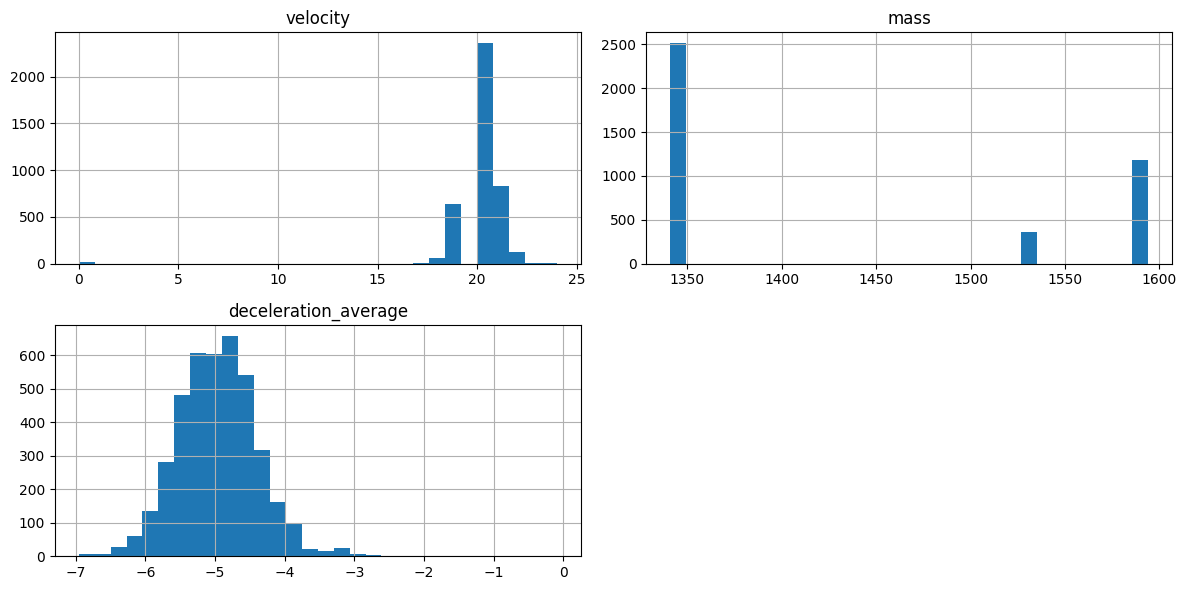

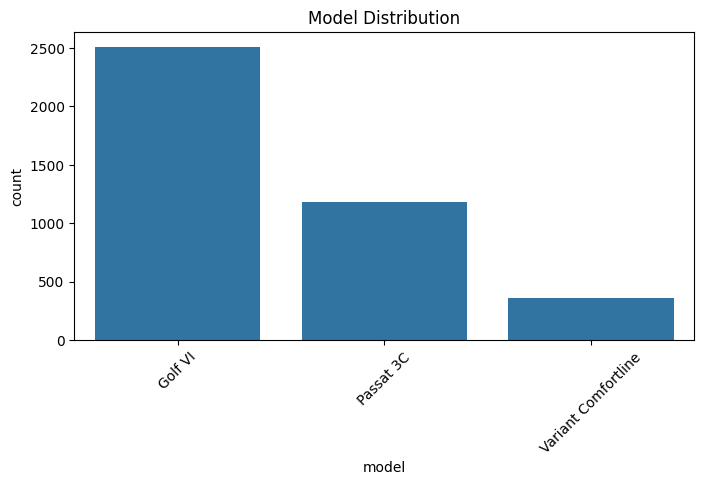

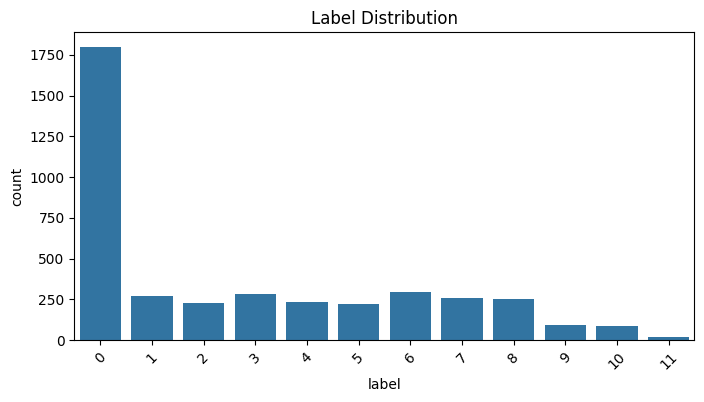

In [8]:
# Plot histograms for numerical features
df[['velocity', 'mass', 'deceleration_average']].hist(figsize=(12, 6), bins=30)
plt.tight_layout()
plt.show()

# Countplot for model distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='model', data=df)
plt.title('Model Distribution')
plt.xticks(rotation=45)
plt.show()

# Countplot for label distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.xticks(rotation=45)
plt.show()

### Sensor data of sample test drive 

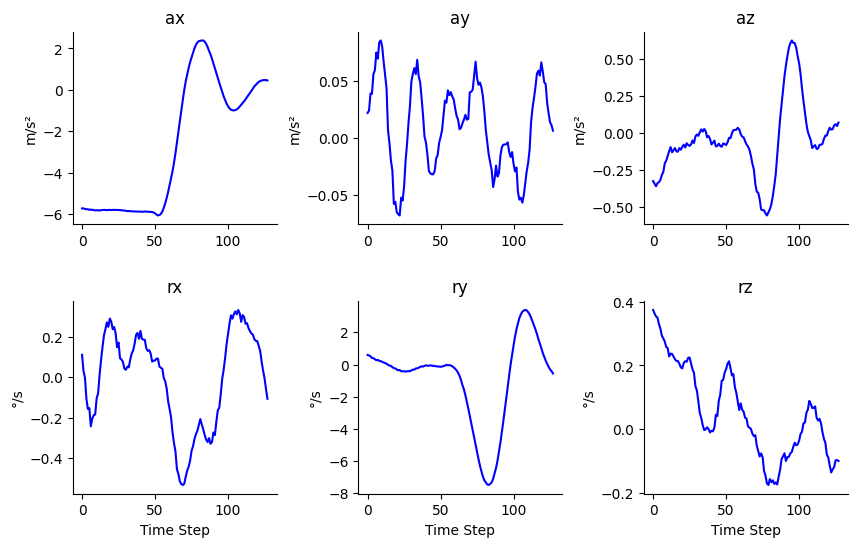

In [ ]:
def plot_drive_data(data: np.ndarray) -> None:   

    
    # Labels for the 6 sensor signals
    labels = ['ax', 'ay', 'az', 'rx', 'ry', 'rz']

    # Create figure and 2x3 subplots
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

    # Loop over each axis and sensor data to plot
    for i, ax in enumerate(axs.flat):
        # Plot the sensor data (without time)
        ax.plot(data[:, i], color='blue')

        # Set subplot title and axis labels
        ax.set_title(labels[i])
        if i < 3:
            ax.set_ylabel('m/s²')
        else:
            ax.set_ylabel('°/s')

        # Remove top and right borders for cleaner look
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        # Add x-axis label for the bottom subplots
        if i >= 3:
            ax.set_xlabel('Time Step')

    # Adjust spaces between subplots
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.show()


plot_drive_data(df.loc[0,'sensor_data'])


### Extract data and labels for training

In [17]:
train_data = np.stack(df.sensor_data.to_numpy())
train_labels = df.label.to_numpy()

# train model:
# ...